# Les opérateurs morphologiques (Morphological Operators)
### Prétraitement morphologique

Quand on s'intéresse à la forme des objets dans une image en niveau de gris ou noir et blanc, on peut faire appel aux opérateurs morphologiques.
Ils modifient la morphologie d'un objet et peuvent intervenir à différentes étapes :
1. Prétraitement : nettoyer l'image, enlever le bruit, et combler les trous dans les objets avant l'analyse.
2. Segmentation : améliorer les résultats.
3. Extraction de contours
4. Analyse de forme : Pour analyser et mesurer les propriétés géométriques des objets, telles que la taille, la forme, et la structure.
5. Modification de forme

Lorsqu'on applique un opérateur morphologique, on lui associe un élément structurant qui peut être une figure géométrique comme un cerce de rayon r, rectangle de L*l ou autres. Il glisse sur les bords des objets et transforme par son passage la valeur des pixels

L'élément structurant peut aussi être basé sur la notion de connectivité :
1. Connexité-4: chaque pixel dans une image a quatre voisins directs : un au-dessus, un en-dessous, un à gauche, et un à droite. Ils forment un même objet.
2. Connexité-8: inclut les quatre voisins de la connexité-4 plus les quatre voisins en diagonale. Si deux pixels appartiennent à un même objet et sont connectés via leurs voisins directs ou diagonaux, ils sont dits 8-connectés.

In [72]:
# Modules
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.morphology import (
    square,
    rectangle,
    diamond,
    disk,
    cube,
    octahedron,
    ball,
    octagon,
    star,
)

### Lire une image en NDG

In [71]:
def read_gray(image_path: str) -> np.ndarray:
    """" Reads and returns an image"""
    image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    if image_gray is None:
        raise ValueError(f"Error: image could not be read. Check file path: {image_path}")
    return image_gray


def otsu_threshold(image) -> np.ndarray:
    """Returns a binary image using otsu"""
    threshold, thresholded = cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    return thresholded

### <span style:color=green>Afficher les résultats<span>

In [70]:
def plot_transformation(original, filtered, filter_name: str):
    fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].imshow(original, cmap="gray")
    ax[0].set_title('original')
    ax[0].set_axis_off()
    ax[1].imshow(filtered, cmap="gray")
    ax[1].set_title(filter_name)
    ax[1].set_axis_off()

## <span style=color:green> L'érosion (Erosion) </span>
l’érosion d’une forme X situé par un élément structurant B est l’ensemble des pixels p telle que la fenêtre Bp soit incluse dans X. Autrement dit, pour chaque pixel de X, on place B centré sur ce pixel et si B ne tient pas entièrement dans X, on enlève ce pixel.

Conséquences:
1. Diminution de la taille des objets de l'avant-plan
2. Division des objets avec des concavités ou des trous en plusieurs objets
3. Perte des petits objets et des détails dans l’image

In [73]:
def erode_image(image: np.ndarray, footprint: np.ndarray) -> np.ndarray:
    """Returns an eroded image

    Args:
        image (np.ndarray): image to erode
        footprint (np.ndarray): Structuring element

    Returns:
        np.ndarray: eroded image
    """
    eroded = cv.morphologyEx(image, cv.MORPH_ERODE, footprint)
    return eroded

## <span style=color:green> La Dilatation (Dilatation ) </span>
La dilatation d’une forme X situé en premier plan par un élément structurant B est l’ensemble obtenu en remplaçant chaque pixel p de X par sa fenêtre Bp. Autrement dit, pour chaque pixel de X, on place B centré sur ce pixel et on ajoute tous les pixels de B à X.

Conséquences:
1. Augmente la taille des objets présents dans l’image
2. Les objets voisins peuvent se fusionner et les petits détails seront perdus
3. Les trous et les point convexes peuvent être bouchés


In [74]:
def dilate_image(image: np.ndarray, footprint: np.ndarray) -> np.ndarray:
    """Returns an dilated image

    Args:
        image (np.ndarray): image to dilate
        footprint (np.ndarray): Structuring element

    Returns:
        np.ndarray: dilated image
    """
    dilated = cv.morphologyEx(image, cv.MORPH_DILATE, footprint)
    return dilated

## <span style=color:green> L'ouverture (Opening) <span>
C'est une érosion suivi d'une dilatation par le même élément structurant

Conséquences
1. Elimination du bruit : L'ouverture est efficace pour éliminer les petits objets ou le bruit sans affecter significativement les objets plus grands
2. Lissage des contours : Elle adoucit les contours des objets en supprimant les protubérances fines
3. Séparation des objets connectés : Elle peut séparer les objets connectés par des ponts fins de pixels

In [75]:
def opening_image(image: np.ndarray, footprint: np.ndarray) -> np.ndarray:
    """Returns an dilated image

    Args:
        image (np.ndarray): the image to transform
        footprint (np.ndarray): Structuring element

    Returns:
        np.ndarray: opened image
    """
    opened = cv.morphologyEx(image, cv.MORPH_OPEN, footprint)
    return opened

## <span style=color:green> La fermeture (closing) </span>
##### C'est une dilatation suivie d'une érosion. La fermeture morphologique permet de remplir les trous dans l'image dont la taille est inférieure à celle de l'élémént structurant et peut relier deux éléments connexes pour n'en faire qu'un. Elle adoucit les contours des objets en remplissant les petites crevasses ou interruptions (Lissage des contours)

In [77]:
def closing_image(image: np.ndarray, footprint: np.ndarray) -> np.ndarray:
    """Returns a closing image

    Args:
        image (np.ndarray): the image to transform
        footprint (np.ndarray): Structuring element, the shape to apply

    Returns:
        np.ndarray: closed image
    """
    closed = cv.morphologyEx(image, cv.MORPH_CLOSE, footprint)
    return closed

## Utiliser les fonctions

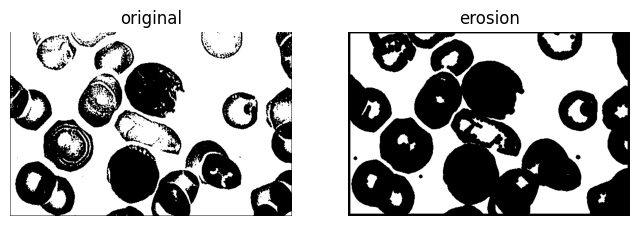

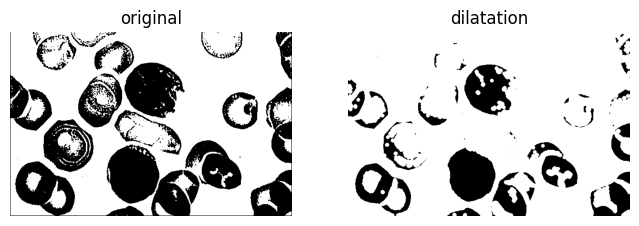

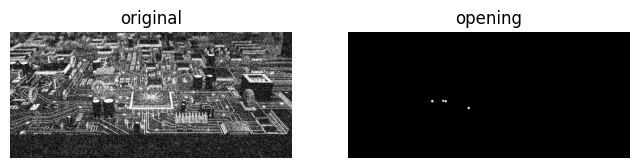

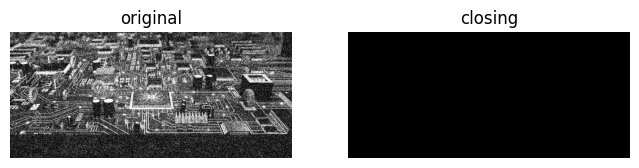

In [76]:
def main(image_path):
    # Read the image
    my_image = read_gray(image_path)
    # Apply otsu
    binarized = otsu_threshold(my_image)
    # Erode the image
    eroded = erode_image(binarized, disk(4))
    # Plot results
    plot_transformation(binarized, eroded, "erosion")
    # Dilate the image
    dilated = dilate_image(binarized, disk(4))
    plot_transformation(binarized, dilated, "dilatation")

def main1(image_path):
    # read the image
    my_image = read_gray(image_path)
    # Add a gaussian noise to the image
    gaussian_noise = random_noise(my_image, 'gaussian', mean=0, var=0.09)
    gaussian_noise = np.array(255 * gaussian_noise, dtype=np.uint8)
    # Apply otsu
    binarized = otsu_threshold(gaussian_noise)
    # Opening
    opened = opening_image(binarized, disk(6))
    #plot result
    plot_transformation(binarized, opened, "opening")
    # Closing
    closed = closing_image(binarized, disk(6))
    plot_transformation(binarized, closed, "closing")
    
    
if __name__ == "__main__":
    image_path = 'Images/database2/cellule.jpg'
    image_path1 = "Images/database2/circuit2.jpg"
    main(image_path)
    main1(image_path1)